In [122]:
import geopy
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas. tools import geocode
import folium
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import geopy

import numpy as np
import requests


In [5]:
gdf = gpd.read_file('City Wards Data.geojson')

Checking to see if the file loaded into the dataframe properly

<AxesSubplot:>

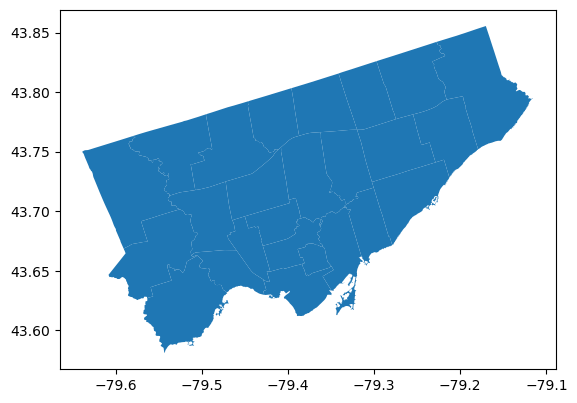

In [30]:
gdf.plot()

Loading the building information info about building permits on to a df

In [7]:
building_permit_df = pd.read_csv('BuildingPermitDimension.csv', low_memory = False)

In [8]:
# print(building_permit_df.head())

      Permit_Num                      Permit_Type  \
0  00 119701 CMB      Residential Building Permit   
1  00 123349 CMB      Residential Building Permit   
2  00 125006 CMB      Residential Building Permit   
3  00 125292 CMB  Non-Residential Building Permit   
4  00 126024 CMB  Non-Residential Building Permit   

                     Structure_Type                                      Work  \
0                    SFD - Detached             Addition to Existing Building   
1                    SFD - Detached  Addition/Alteration to Existing Building   
2               SFD - Semi-Detached                              New Building   
3                       Group A & B           Alteration to Existing Building   
4  Restaurant Greater Than 30 Seats           Alteration to Existing Building   

  Street_Num   Street_Name Street_Type Street_Direction Postal      Geo_Id  \
0         11       BETHNAL         AVE                     M8Y    987568.0   
1        326       KENNEDY         AVE

Indexing the building permits data to only show the addresses associated with the permits

In [52]:
raw_street_data = building_permit_df.loc[:,"Street_Num":"Street_Direction"]

In [10]:
street_data = raw_street_data.astype(str).agg(', '.join, axis=1)

Converting the raw data into a string. Adding the strings to a list. Export list to a CSV

In [11]:
raw_street_data.to_csv('raw_addresses.csv',index=False)

Geocoding Section - Turning appending address columns into one string

In [12]:
#lets choose our sample dataset
transportation_sample = "transporation_sample.csv"
transportation_df = pd.read_csv(transportation_sample)
#print(transportation_df.head())

      Permit_Num                     Permit_Type  \
0  13 115917 BLD  Building Additions/Alterations   
1  13 116906 BLD  Building Additions/Alterations   
2  14 250795 BLD  Building Additions/Alterations   
3  14 260878 BLD  Building Additions/Alterations   
4  15 131086 BLD  Building Additions/Alterations   

                         Structure_Type                  Work Street_Num  \
0  Transit Station,Subway, Bus Terminal  Interior Alterations          1   
1  Transit Station,Subway, Bus Terminal  Interior Alterations         33   
2  Transit Station,Subway, Bus Terminal  Interior Alterations         38   
3  Transit Station,Subway, Bus Terminal  Interior Alterations         22   
4  Transit Station,Subway, Bus Terminal  Interior Alterations         55   

  Street_Name Street_Type Street_Direction Postal      Geo_Id Ward_Grid  \
0    YORKDALE          RD                     M6A   4940063.0     N1502   
1       BLOOR          ST                E    M4W  13497814.0     S2708   
2    

In [105]:
real_estate_df = pd.read_csv('realestate_sample.csv')
# print(real_estate_df.head())
real_estate_df['Address'] = real_estate_df['Street_Num'] + "," +real_estate_df['Street_Name'] + ","+ real_estate_df['Street_Type'] +" " + real_estate_df['Street_Direction']
# print(real_estate_df.head())


      Permit_Num                     Permit_Type      Structure_Type  \
0  01 185413 BLD  Building Additions/Alterations      Parking Garage   
1  04 167768 BLD  Building Additions/Alterations  Apartment Building   
2  06 176865 BLD                      New Houses      SFD - Detached   
3  07 132494 BLD                      New Houses  Stacked Townhouses   
4  07 244088 BLD                      New Houses      SFD - Detached   

                   Work Street_Num    Street_Name Street_Type  \
0  Interior Alterations         20  THE QUEENSWAY               
1  Interior Alterations    600-604         ROGERS          RD   
2          New Building         12     THE BRIDLE        PATH   
3          New Building        651         WARDEN         AVE   
4          New Building        514          VESTA          DR   

  Street_Direction Postal      Geo_Id Ward_Grid Application_Date Issued_Date  \
0                     M6R   8855505.0     S1404       2001-10-12  2001-11-08   
1               

In [107]:
amenities_df = pd.read_csv('amenities_sample.csv')
# print(real_estate_df.head())
amenities_df['Address'] = amenities_df['Street_Num'] + "," +amenities_df['Street_Name'] + ","+ amenities_df['Street_Type'] +" " + amenities_df['Street_Direction']
print(amenities_df.head())

      Permit_Num                      Permit_Type  \
0  00 330311 CMB  Non-Residential Building Permit   
1  02 151529 BLD   Building Additions/Alterations   
2  04 111348 BLD   Building Additions/Alterations   
3  04 198435 BLD   Building Additions/Alterations   
4  05 115473 BLD                     New Building   

                 Structure_Type                                      Work  \
0  Hair, Barber and Other Salon  Addition/Alteration to Existing Building   
1                        Museum                      Interior Alterations   
2        Performing Arts Centre                      Interior Alterations   
3                Fitness Centre                      Interior Alterations   
4                          Club                              New Building   

  Street_Num   Street_Name Street_Type Street_Direction Postal      Geo_Id  \
0       3360         YONGE          ST                     M4N   7793316.0   
1        100      GARRISON          RD                     M5V

In [64]:
#now let's add a new column for our address
# transportation_df['Address'] =  transportation_df.loc[:, "Street_Num":"Street_Direction"].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
#above code is the same as
transportation_df['Address'] = transportation_df['Street_Num'] + "," +transportation_df['Street_Name'] + ","+ transportation_df['Street_Type'] +" " + transportation_df['Street_Direction']
#print(transportation_df.head())
# valid_transportation = transportation_df.dropna(subset=['Address'])
# valid_transportation['Address'].to_csv("address 2.csv", index = False)
# print(valid_transportation)
print(transportation_df.head())

      Permit_Num                     Permit_Type  \
0  13 115917 BLD  Building Additions/Alterations   
1  13 116906 BLD  Building Additions/Alterations   
2  14 250795 BLD  Building Additions/Alterations   
3  14 260878 BLD  Building Additions/Alterations   
4  15 131086 BLD  Building Additions/Alterations   

                         Structure_Type                  Work Street_Num  \
0  Transit Station,Subway, Bus Terminal  Interior Alterations          1   
1  Transit Station,Subway, Bus Terminal  Interior Alterations         33   
2  Transit Station,Subway, Bus Terminal  Interior Alterations         38   
3  Transit Station,Subway, Bus Terminal  Interior Alterations         22   
4  Transit Station,Subway, Bus Terminal  Interior Alterations         55   

  Street_Name Street_Type Street_Direction Postal      Geo_Id Ward_Grid  \
0    YORKDALE          RD                     M6A   4940063.0     N1502   
1       BLOOR          ST                E    M4W  13497814.0     S2708   
2    

In [124]:
nom = Nominatim(user_agent="seronk", timeout = 10) #our geocoder
geocode = RateLimiter(nom.geocode, min_delay_seconds= 1)

viewbox = [(43.6,-79.6,),(43.85, -79.1,)] #making that it favours results in this box (Toronto)

# examples
print(nom.geocode("   33 BLOOR ST E   ", viewbox=viewbox, bounded=True).latitude)
print(nom.geocode("33	BLOOR	ST	E").longitude)

43.67002695
-79.38547384062947


Turning Full Addresses into Coordinates using the geocoder

In [131]:
#coordinate extraction
from tqdm.notebook import tqdm
tqdm.pandas()
transportation_df["full_location_information"] = transportation_df['Address'].progress_apply(lambda x: nom.geocode(x, addressdetails=True, viewbox=viewbox, bounded=True))

  0%|          | 0/379 [00:00<?, ?it/s]

GeocoderTimedOut: Non-successful status code 503

In [146]:
print(transportation_df.head())

      Permit_Num                     Permit_Type  \
0  13 115917 BLD  Building Additions/Alterations   
1  13 116906 BLD  Building Additions/Alterations   
2  14 250795 BLD  Building Additions/Alterations   
3  14 260878 BLD  Building Additions/Alterations   
4  15 131086 BLD  Building Additions/Alterations   

                         Structure_Type                  Work Street_Num  \
0  Transit Station,Subway, Bus Terminal  Interior Alterations          1   
1  Transit Station,Subway, Bus Terminal  Interior Alterations         33   
2  Transit Station,Subway, Bus Terminal  Interior Alterations         38   
3  Transit Station,Subway, Bus Terminal  Interior Alterations         22   
4  Transit Station,Subway, Bus Terminal  Interior Alterations         55   

  Street_Name Street_Type Street_Direction Postal      Geo_Id  ...  \
0    YORKDALE          RD                     M6A   4940063.0  ...   
1       BLOOR          ST                E    M4W  13497814.0  ...   
2    COMSTOCK       

In [125]:
tqdm.pandas()
amenities_df["full_location_information"] = amenities_df['Address'].progress_apply(lambda x: nom.geocode(x, addressdetails=True, viewbox=viewbox, bounded=True))

  0%|          | 0/710 [00:00<?, ?it/s]

In [ ]:
print(amenities_df.head())

In [ ]:
tqdm.pandas()
real_estate_df["full_location_information"] = real_estate_df['Address'].progress_apply(lambda x: nom.geocode(x, addressdetails=True, viewbox=viewbox))

In [0]:
print(real_estate_df['full_location_information'])

In [132]:
#actually putting the points
transportation_df['Coordinates'] = transportation_df["full_location_information"].apply(lambda x: Point( x.longitude, x.latitude,) if x else None)

In [87]:
#actually putting the points
amenities_df['Coordinates'] = amenities_df["full_location_information"].apply(
    lambda x: Point(x.longitude, x.latitude, ) if x else None)

0                     POINT (-79.4491256 43.7251945)
1                     POINT (-79.3856383 43.6697592)
2                                               None
3                     POINT (-73.6812866 41.0007729)
4                     POINT (-77.9595256 44.3082852)
                           ...                      
374                   POINT (-79.3434305 43.7371795)
375                     POINT (-79.39853 43.7061229)
376                                             None
377     POINT (-91.13154277312488 34.37679564136003)
378    POINT (0.1023971827490576 51.432694600000005)
Name: Coordinates, Length: 379, dtype: object


MAPPING SECTION
test

In [147]:
#getting our map ready. we need to project the initial GeoJSON onto the folium map
gdf_projected = gdf.to_crs(epsg=4326)
s_index = gdf_projected.sindex
centroid = gdf_projected.geometry.centroid

/var/folders/73/svsm8vw94tzb_w86qcpwfh2h0000gn/T/ipykernel_5992/2719398586.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid = gdf_projected.geometry.centroid


In [148]:
mean_latitude = centroid.y.mean()
mean_longitude = centroid.x.mean()

In [74]:
m = folium.Map(location=[mean_latitude, mean_longitude], zoom_start=10)

In [75]:
folium.GeoJson(gdf_projected.to_json()).add_to(m)

In [134]:
#ward mapping function
def ward_mapper(point):
    ward_index = None
    ward_name = None
    
    if point is not None:
        possible_matches_index = list(s_index.intersection(point.bounds))
        found_match = False
        for idx in possible_matches_index:
            if gdf['geometry'][idx].contains(point):
                print("Point is contained within geometry at index:", idx)
                # Optionally, you can also print more information about the geometry
                print(gdf.iloc[idx]['AREA_NAME'])
                found_match = True
                ward_name = gdf.iloc[idx]['AREA_NAME']
                ward_index = idx

                break

        if not found_match:
            print(f"Point {point} is not contained in any ward.")

    #alternative code if the above one breaks
    # contained_in_ward = False
    # for index, row in gdf_projected.iterrows():
    #     if row['geometry'].contains(point):
    #         ward_name = row['AREA_NAME']  # Extracting the ward name from the 'AREA_NAME' field
    #         print(f"Point {point} is contained within ward: {ward_name}, at index {index}.")
    #         contained_in_ward = True
    #         break
    #
    # if not contained_in_ward:
    #     print(f"Point {point} is not contained in any ward.")

        latitude, longitude = point.y, point.x
        folium.Marker(location=(latitude, longitude), popup='Point').add_to(m)
    return ward_index,ward_name


In [135]:
ward_mapping_result = transportation_df['Coordinates'].apply(ward_mapper)

Point is contained within geometry at index: 17
Eglinton-Lawrence
Point is contained within geometry at index: 3
University-Rosedale
Point POINT (-73.6812866 41.0007729) is not contained in any ward.
Point POINT (-77.9595256 44.3082852) is not contained in any ward.
Point POINT (-1.7242592 54.6309164) is not contained in any ward.
Point is contained within geometry at index: 12
Toronto-St. Paul's
Point POINT (-75.2912387 41.9569881) is not contained in any ward.
Point POINT (121.5105634 25.0442171) is not contained in any ward.
Point POINT (121.5105634 25.0442171) is not contained in any ward.
Point POINT (-91.13154277312488 34.37679564136003) is not contained in any ward.
Point POINT (121.5105634 25.0442171) is not contained in any ward.
Point is contained within geometry at index: 12
Toronto-St. Paul's
Point is contained within geometry at index: 12
Toronto-St. Paul's
Point is contained within geometry at index: 15
Etobicoke-Lakeshore
Point is contained within geometry at index: 12
T

In [136]:
# Unpack the result into separate columns in the DataFrame
transportation_df['Ward_Index'], transportation_df['Ward'] = zip(*ward_mapping_result)

In [140]:
print(transportation_df.loc[:, ['Coordinates','Ward_Index', 'Ward']])

                                       Coordinates  Ward_Index  \
0                   POINT (-79.4491256 43.7251945)        17.0   
1                   POINT (-79.3856383 43.6697592)         3.0   
2                                             None         NaN   
3                   POINT (-73.6812866 41.0007729)         NaN   
4                   POINT (-77.9595256 44.3082852)         NaN   
..                                             ...         ...   
374                 POINT (-79.3434305 43.7371795)        19.0   
375                   POINT (-79.39853 43.7061229)        12.0   
376                                           None         NaN   
377   POINT (-91.13154277312488 34.37679564136003)         NaN   
378  POINT (0.1023971827490576 51.432694600000005)         NaN   

                    Ward  
0      Eglinton-Lawrence  
1    University-Rosedale  
2                   None  
3                   None  
4                   None  
..                   ...  
374      Don Valle

In [144]:
amenities_df['Ward_Index'], amenities_df['Ward'] = zip(*amenities_df['Coordinates'].apply(ward_mapper))
print(amenities_df.loc[:, ['Coordinates','Ward_Index', 'Ward']])

Point is contained within geometry at index: 12
Toronto-St. Paul's
Point POINT (-79.0867213 43.879356) is not contained in any ward.
Point POINT (-81.1600211 42.7570765) is not contained in any ward.
Point POINT (-52.7469114 47.5638042) is not contained in any ward.
Point is contained within geometry at index: 17
Eglinton-Lawrence
Point POINT (-81.1600211 42.7570765) is not contained in any ward.
Point POINT (-86.2939097 39.7032605) is not contained in any ward.
Point POINT (-78.7394893 35.7393598) is not contained in any ward.
Point is contained within geometry at index: 15
Etobicoke-Lakeshore
Point is contained within geometry at index: 3
University-Rosedale
Point POINT (-87.533787 33.239243) is not contained in any ward.
Point POINT (-72.70188471430612 41.74322701919015) is not contained in any ward.
Point POINT (-76.1735941 44.7159308) is not contained in any ward.
Point is contained within geometry at index: 1
York Centre
Point is contained within geometry at index: 21
Toronto Cen

In [145]:
m